In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler


plt.rcParams.update({'font.size':14})
plt.rcParams.update({"font.family" : "Times new roman"})

# Import The Limited Power Dataset

In [4]:
df1=pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/Github/FaultDiagnosis/PanelFaultDiagnosis/PreProcessed Data/Lim_solar_data.csv')
df2=pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/Github/FaultDiagnosis/PanelFaultDiagnosis/PreProcessed Data/Max_solar_data.csv')

df1.head()

,Time,Ipv,Vpv,Vdc,ia,ib,ic,va,vb,vc,Iabc,If,Vabc,Vf,label
0,0.000028,1.572327,101.348877,144.140625,-0.135133,0.490112,-0.354985,41.744537,-149.872894,109.064585,1.000000,50.000000,1.000000,50.000000,F0L
1,0.010027,1.539215,101.251221,143.261719,0.086425,-0.490112,0.349971,-42.311096,149.029083,-108.377482,1.000000,50.000000,1.000000,50.000000,F0L
2,0.020026,1.637604,101.031494,143.554688,-0.155274,0.469971,-0.307988,41.515503,-149.933167,109.104767,1.000000,50.000000,1.000000,50.000000,F0L
3,0.030025,1.577057,101.287842,142.968750,0.106566,-0.456543,0.336543,-42.106171,150.222473,-109.249420,0.461228,49.921509,151.655756,50.078264,F0L
4,0.040024,1.613007,101.049805,143.847656,-0.155274,0.456543,-0.314702,41.370850,-150.162201,109.245402,0.311221,49.594346,154.027080,50.193078,F0L


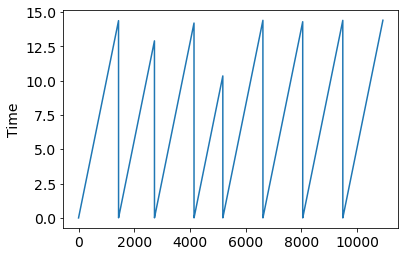

In [5]:
plt.plot(df1['Time'])
plt.ylabel('Time')
plt.show()

# Plot a Bar Chart for samples from each fault class

In [10]:
df1['label'].value_counts()

F7L    1441
F4L    1440
F6L    1440
F0L    1438
F5L    1430
F2L    1421
F1L    1290
F3L    1035
Name: label, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


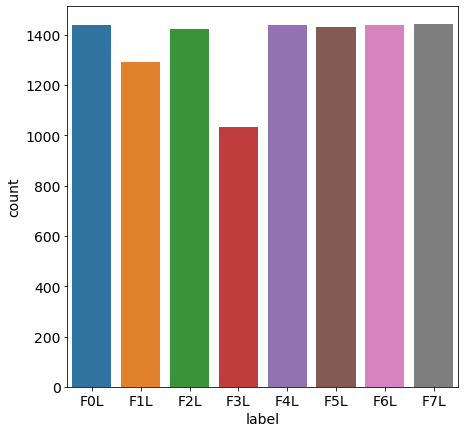

In [16]:
fig = plt.figure(figsize=(7,7))
sns.countplot(df1['label'])
plt.show()

# Show a correlation heatmap

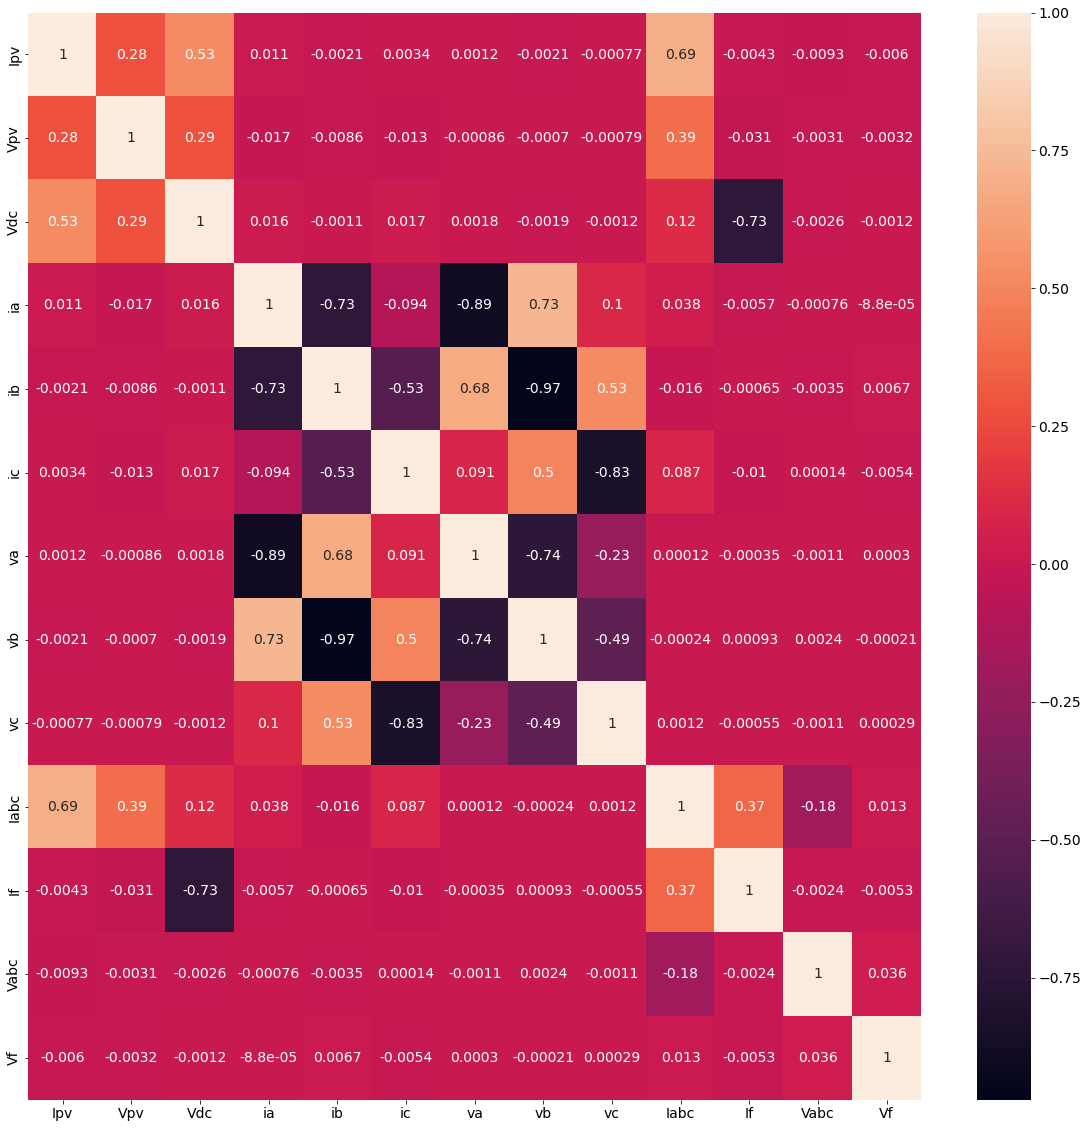

In [20]:
X = df1.iloc[:,1:-1]  #Features
Y = df1.iloc[:,-1]      #Traget Labels


plt.figure(figsize=(20,20))
sns.heatmap(X.corr(), annot=True)
plt.show()

# Data Visualization

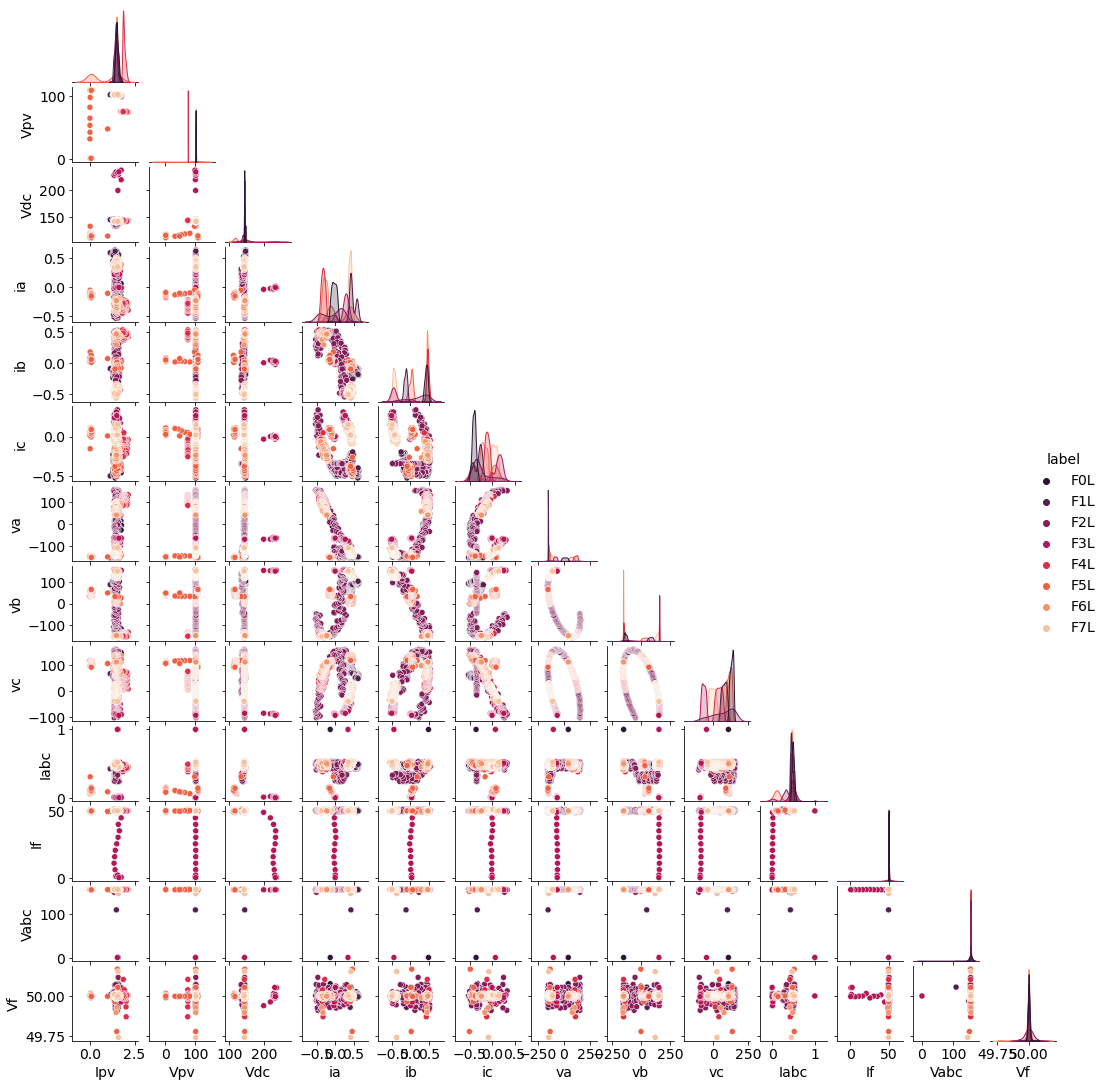

In [21]:
g = sns.pairplot(data=df1.iloc[::10,1:], hue='label', corner=True, palette='rocket')
g.fig.set_size_inches(15,15)

# Divide the dataset into Train-test split and do the standard scalling

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

scaler = StandardScaler()
X_sc_train = scaler.fit_transform(X_train)
X_sc_test = scaler.fit(X_test)

In [24]:
print("The number of samples in the Training set is {}".format(len(X_train)))
print("The number of samples in the Test set is {}".format(len(X_test)))

The number of samples in the Training set is 8748
The number of samples in the Test set is 2187


# Dimensionality Reduction Using PCA

In [25]:
pca = PCA(n_components=2)
pca.fit(X_sc_train)

PCA(n_components=2)

In [29]:
transformed = pca.transform(X_sc_train)

In [30]:
X_sc_train.shape

(8748, 13)

In [31]:
transformed.shape

(8748, 2)

In [32]:
pca.explained_variance_ratio_

array([0.27421605, 0.1702461 ])

In [37]:
for i in range(X_sc_train.shape[1]):
  pca = PCA(n_components=i)
  pca.fit_transform(X_sc_train)
  print("Cummulative explained variance for {}-component: {} ".format(i,np.sum(pca.explained_variance_ratio_)))
  print("") 

Cummulative explained variance for 0-component: 0.0 

Cummulative explained variance for 1-component: 0.2742160460868214 

Cummulative explained variance for 2-component: 0.44446214161408937 

Cummulative explained variance for 3-component: 0.6071379461116081 

Cummulative explained variance for 4-component: 0.74201900859271 

Cummulative explained variance for 5-component: 0.821711023481854 

Cummulative explained variance for 6-component: 0.8961977760912179 

Cummulative explained variance for 7-component: 0.9543096314172754 

Cummulative explained variance for 8-component: 0.9724509067229876 

Cummulative explained variance for 9-component: 0.9856421003368858 

Cummulative explained variance for 10-component: 0.9932450645831588 

Cummulative explained variance for 11-component: 0.9982083715686164 

Cummulative explained variance for 12-component: 0.9999865916219824 



# PCA with 2 components Visualization

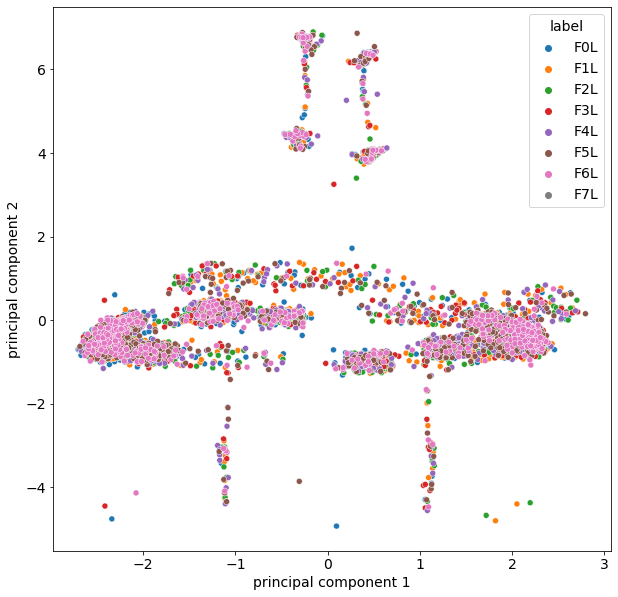

In [40]:
pca = PCA(n_components=2)
transformed = pca.fit_transform(X_sc_train)
principalDf = pd.DataFrame(data = transformed
             , columns = ['principal component 1', 'principal component 2'])
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(x=principalDf['principal component 1'],y=principalDf['principal component 2'],hue=y_train)
plt.show()

# PCA with 3 components Visualization

In [41]:
pca_3 = PCA(n_components=3)

X_pca = pca_3.fit_transform(X_sc_train)

principalDf = pd.DataFrame(data = X_pca, columns = ['principal component 1', 'principal component 2','principal component 3'])

principalDf['Fault']=np.array(y_train)